# Tổng quan

## Giới thiệu

Dự án Phân tích điểm thi đại học nhằm mục đích thu thập và phân tích dữ liệu điểm thi đại học nhằm cung cấp thông tin hữu ích cho thí sinh, phụ huynh và các nhà hoạch định giáo dục. Dự án bao gồm hai giai đoạn chính: thu thập dữ liệu và phân tích dữ liệu.

### Thu thập dữ liệu

Dữ liệu điểm thi đại học được thu thập từ nhiều nguồn khác nhau, bao gồm:

* Website của các trường đại học
* Website của Bộ Giáo dục và Đào tạo
* Các trang báo điện tử uy tín

Dữ liệu được thu thập một cách tự động bằng Python và thư viện. Các công cụ crawl web được sử dụng để truy cập các trang web có chứa dữ liệu điểm thi và trích xuất thông tin cần thiết một cách hiệu quả.

### Phân tích dữ liệu

Dữ liệu điểm thi sau khi được thu thập sẽ được phân tích bằng các phương pháp thống kê và học máy. Các phương pháp phân tích dữ liệu được sử dụng bao gồm:

* Phân tích mô tả: Mô tả các đặc điểm cơ bản của dữ liệu điểm thi, chẳng hạn như phân bố điểm, điểm trung bình, điểm cao nhất, điểm thấp nhất, v.v.
* Phân tích so sánh: So sánh điểm thi của các thí sinh theo các tiêu chí khác nhau, chẳng hạn như khu vực, trường thi, khối thi, môn thi, v.v.
* Phân tích dự đoán: Dự đoán điểm thi của thí sinh trong các kỳ thi sắp tới dựa trên dữ liệu điểm thi của các kỳ thi trước.

### Kết quả

Kết quả phân tích dữ liệu điểm thi đại học sẽ được trình bày dưới dạng báo cáo, biểu đồ, đồ thị và các hình ảnh trực quan khác. Các kết quả này sẽ cung cấp thông tin hữu ích cho thí sinh, phụ huynh và các nhà hoạch định giáo dục.

Dự án Phân tích điểm thi đại học mang lại nhiều lợi ích cho cộng đồng, bao gồm:

* Cung cấp thông tin hữu ích cho thí sinh: Giúp thí sinh đánh giá năng lực bản thân, lựa chọn nguyện vọng thi phù hợp và có kế hoạch ôn thi hiệu quả.
* Hỗ trợ phụ huynh: Giúp phụ huynh định hướng cho con em mình trong việc lựa chọn ngành học và trường đại học phù hợp.
* Cung cấp dữ liệu cho các nhà hoạch định giáo dục: Giúp các nhà hoạch định giáo dục đánh giá chất lượng giáo dục, đưa ra các chính sách giáo dục phù hợp và nâng cao hiệu quả tuyển sinh đại học.

# Hướng dẫn thu thập dữ liệu điểm thi đại học

Tính đến thời điểm hiện tại, chuẩn bị sắp tới kỳ thi THPT Quốc Gia 2024 nên một số trang không còn lưu trữ dữ liệu của năm trước. Tiêu chí tìm kiếm trang sẽ là một trang website công bố điểm thi uy tín, không có captra khi nhập số báo danh.

Sau khi tìm kiếm một lượt, ta thấy trang https://diemthi.vnanet.vn của vnanet rất phù hợp ==> quất luôn trang này để crawl dữ liệu

## Chuẩn bị môi trường

Bước đầu tiên là cài đặt Python và các thư viện cần thiết. Bạn có thể sử dụng pip, trình quản lý gói của Python, để cài đặt:
* requests: Thư viện mạnh mẽ cho việc gửi yêu cầu HTTP đến server.
* pandas: Thư viện thao tác và phân tích dữ liệu dạng bảng, cung cấp cấu trúc DataFrame linh hoạt.

In [ ]:
!pip install requests
!pip install pandas

### Import thư viện

* requests: Thư viện để thực hiện yêu cầu HTTP đến API.
* time: Thư viện để điều khiển thời gian, dùng để tạo độ trễ giữa các yêu cầu.
* pandas: Thư viện để thao tác dữ liệu với DataFrame.
* os: Thư viện để tương tác với hệ điều hành, dùng để kiểm tra sự tồn tại của file.

In [ ]:
import requests
import time
import pandas as pd
import os

## Xây dựng danh sách mã tỉnh

Hiện tại mã số của thí sinh dự thi sẽ có dạng AABBBBBB trong đó AA là mã tỉnh, BBBBBB là mã thí sinh.

Tính đến thời điểm năm 2023, Việt Nam có 64 tỉnh, vậy AA sẽ bắt đầu từ 01 và kết thúc là 64. Tìm hiểu trên Google, ta thấy có trang https://diemthi.beecost.vn/
 và https://diemthi.vnanet.vn/ có API để lấy được dữ liệu chung trong toàn tỉnh. Ta nhập test thử với SBD là 01000001 và ra kết quả
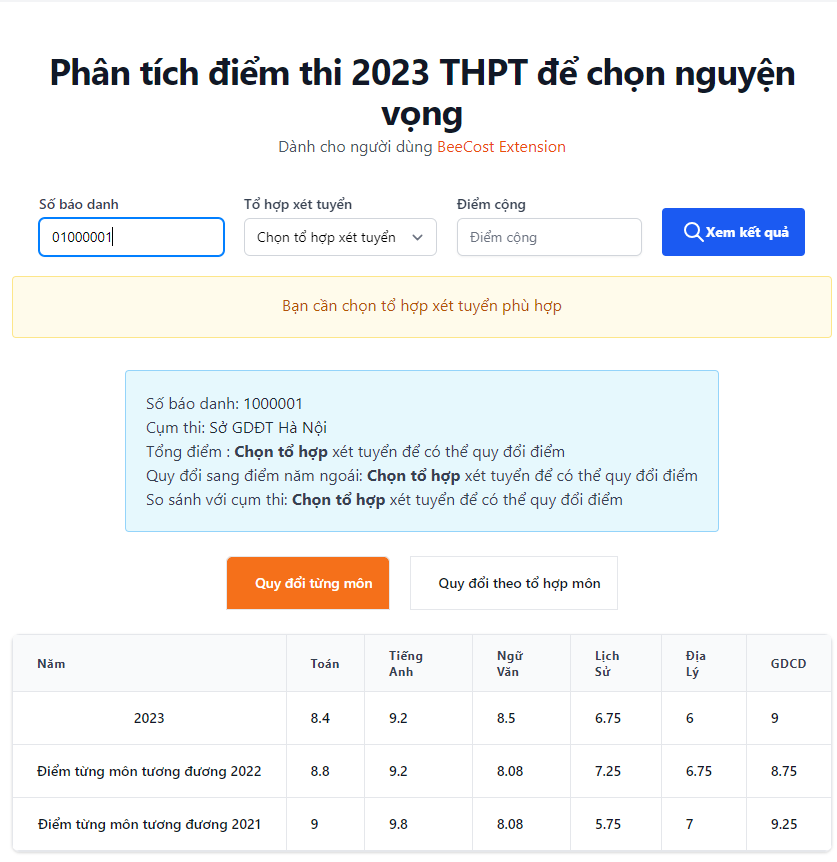


Để ý thì api này có header Access-Control-Allow-Origin = * . Quá ngon luôn
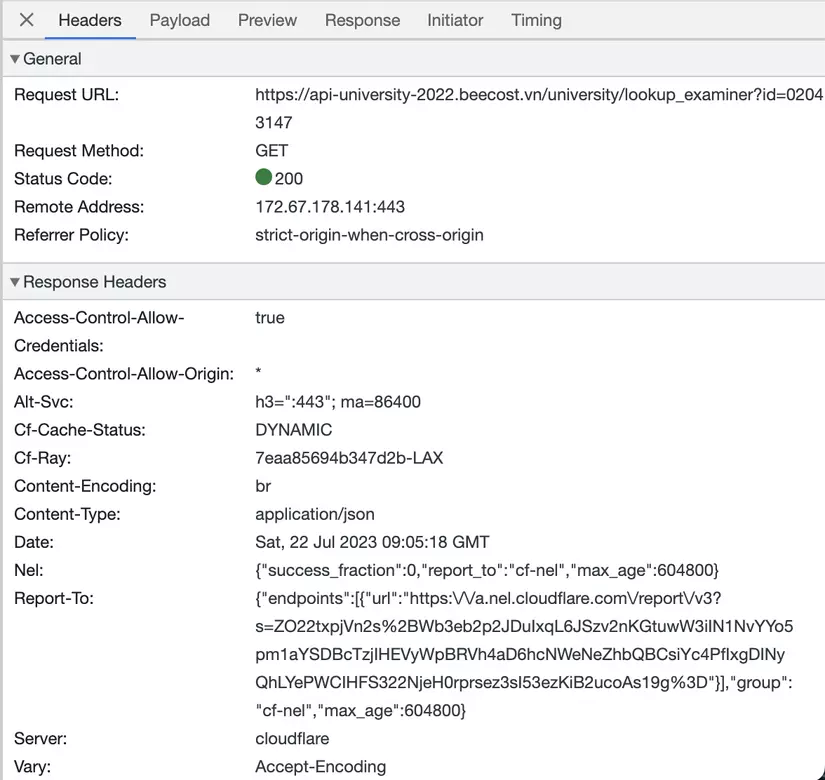

Tìm hiểu cấu trúc của API, ta thấy có 1 tham số truyền vào là id

https://api-university-2022.beecost.vn/university/lookup_examiner?id=01000001

Trong đó, ta thấy có thông tin để lấy đc tên của Sở GD thông qua trường test_location:

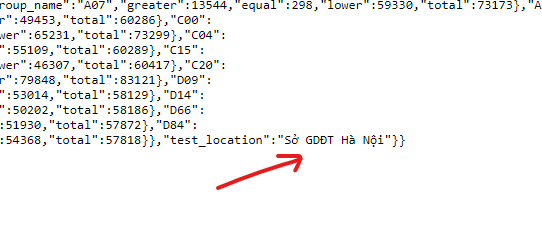



Ta sẽ sử dụng hàm get data bằng thư viện requests. Dữ liệu truyền vào là đường dẫn, và đầu ra là kết quả crawl được (mã 200 là oke)

In [ ]:
response = requests.get("https://api-university-2022.beecost.vn/university/lookup_examiner?id=01000001")
print(response)

<Response [200]>


Ta sử dụng hàm json để chuyển nó về dạng json rồi lưu vào biến data

In [ ]:
data = response.json()
print(data)

{'status': 'success', 'data': {'scores': {'id': 1000001, 'mathematics_score': 8.4, 'physics_score': None, 'chemistry_score': None, 'foreign_language_score': 9.2, 'foreign_language_type': 'N1', 'english_score': 9.2, 'russian_score': None, 'french_score': None, 'chinese_score': None, 'german_score': None, 'japanese_score': None, 'biology_score': None, 'literature_score': 8.5, 'history_score': 6.75, 'geography_score': 6.0, 'civic_education_score': 9.0, 'year': '2023', 'subject_group_score': {'A07': 21.15, 'A08': 24.15, 'A09': 23.4, 'C00': 21.25, 'C03': 23.65, 'C04': 22.9, 'C14': 25.9, 'C15': 24.15, 'C19': 24.25, 'C20': 23.5, 'D01': 26.1, 'D09': 24.35, 'D10': 23.6, 'D14': 24.45, 'D15': 23.7, 'D66': 26.7, 'D78': 24.95, 'D84': 26.6, 'D96': 24.85}, 'korean_score': None}, 'equivalent_scores': {'mathematics_score': 8.8, 'english_score': 9.2, 'literature_score': 8.08, 'history_score': 7.25, 'geography_score': 6.75, 'civic_education_score': 8.75, 'subject_group_score': {'A07': 22.8, 'A08': 24.8, 

Ta thấy có khóa "test_location" chính là lưu thông tin các Sở GDĐT và nằm trong khóa "data" nên sử dụng hàm get lấy giá trị

In [ ]:
print(data["data"].get("test_location"))

Sở GDĐT Hà Nội


Hoàn thiện hàm lấy mã tỉnh với id test là `01000001` . Ta được kết quả là Sở GDĐT Hà Nội

In [ ]:
def getLocation():
    try:
        response = requests.get("https://api-university-2022.beecost.vn/university/lookup_examiner?id=01000001")
        data = response.json()
        if data and data.get("data"):
            test_location = data["data"].get("test_location")
            return test_location
    except Exception as e:
        print("Error:", e)

print(getLocation())

Sở GDĐT Hà Nội


Vì mã tỉnh bắt đầu từ 01 tới 64, nên ta chỉ cần tạo một vòng lặp để lấy từng tên của các Sở GD tỉnh và lưu vào biến result có dạng là Dictionary.

In [ ]:
def getTestLocation(id):
    try:
        response = requests.get(f"https://api-university-2022.beecost.vn/university/lookup_examiner?id={id}")
        data = response.json()
        if data and data.get("data"):
            test_location = data["data"].get("test_location")
            return test_location
    except Exception as e:
        print("Error:", e)

cities = {}
for i in range(1, 65):
    id = str(i).zfill(2) + "000001"  # Convert the integer to a string and pad with 0 on the left if necessary
    location_name = getTestLocation(id)
    if location_name:
        cities[location_name] = id

print(cities)

{'Sở GDĐT Hà Nội': '01000001', 'Sở GDĐT TP. Hồ Chí Minh': '02000001', 'Sở GDĐT Hải Phòng': '03000001', 'Sở GDĐT Đà Nẵng': '04000001', 'Sở GDĐT Hà Giang': '05000001', 'Sở GDĐT Cao Bằng': '06000001', 'Sở GDĐT Lai Châu': '07000001', 'Sở GDĐT Lào Cai': '08000001', 'Sở GDĐT Tuyên Quang': '09000001', 'Sở GDĐT Lạng Sơn': '10000001', 'Sở GDĐT Bắc Kạn': '11000001', 'Sở GDĐT Thái Nguyên': '12000001', 'Sở GDĐT Yên Bái': '13000001', 'Sở GDĐT Sơn La': '14000001', 'Sở GDĐT Phú Thọ': '15000001', 'Sở GDĐT Vĩnh Phúc': '16000001', 'Sở GDĐT Quảng Ninh': '17000001', 'Sở GDĐT Bắc Giang': '18000001', 'Sở GDĐT Bắc Ninh': '19000001', 'Sở GDĐT Hải Dương': '21000001', 'Sở GDĐT Hưng Yên': '22000001', 'Sở GDĐT Hoà Bình': '23000001', 'Sở GDĐT Hà Nam': '24000001', 'Sở GDĐT Nam Định': '25000001', 'Sở GDĐT Thái Bình': '26000001', 'Sở GDĐT Ninh Bình': '27000001', 'Sở GDĐT Thanh Hoá': '28000001', 'Sở GDĐT Nghệ An': '29000001', 'Sở GDĐT Hà Tĩnh': '30000001', 'Sở GDĐT Quảng Bình': '31000001', 'Sở GDĐT Quảng Trị': '320000

## Xây dựng đoạn code crawl dữ liệu

**Khởi tạo DataFrame:**

```python
df = pd.DataFrame()
```

* **`df`:** Khởi tạo một DataFrame rỗng để lưu trữ dữ liệu thu thập được từ API.

**Kiểm tra sự tồn tại của file CSV:**

```python
file_exists = os.path.isfile('./Data/data.csv')
```

* **`file_exists`:** Kiểm tra xem file CSV có tồn tại trong thư mục `./Data/` chưa. Nếu file chưa tồn tại, biến `file_exists` sẽ là `False`.

**Vòng lặp thu thập dữ liệu:**

```python
for city, start_code in cities.items():
    code = int(start_code)
    while True:
        # ... logic thu thập dữ liệu ...
```

* **`for city, start_code in cities.items():`:** Vòng lặp `for` duyệt qua từng phần tử (key, value) trong dictionary `cities`. `city` là tên thành phố, `start_code` là mã số của trường bắt đầu cho thành phố đó.
* **`code = int(start_code)`:** Chuyển đổi mã số `start_code` (kiểu chuỗi) thành kiểu số nguyên.
* **`while True`:** Vòng lặp vô hạn, sẽ tiếp tục chạy cho đến khi gặp điều kiện dừng.

**Thu thập dữ liệu từ API:**

```python
url = f"https://api-university-2022.beecost.vn/university/lookup_examiner?id={str(code).zfill(8)}"
try:
    response = requests.get(url)
    data = response.json()

    if not data or 'error' in data:
        # Bỏ qua mã số lỗi, tăng mã và tiếp tục
        code += 1
        continue

    # Trích xuất "scores" and "test_location"
    scores = data['data']['scores']
    test_location = data['data']['test_location']

    # Thêm 'test_location' vào dictionary "scores"
    scores['test_location'] = test_location

    # Tạo DataFrame từ dữ liệu
    flat_data = pd.DataFrame([scores])

    # Lấy header từ DataFrame đầu tiên nếu file chưa tồn tại
    if not file_exists and not flat_data.empty:
        header = flat_data.columns.tolist()
        flat_data.to_csv('./Data/data.csv', mode='w', header=header, index=False)  # Ghi với mode='w' để ghi đè
        file_exists = True
    else:
        # Ghi dữ liệu vào file CSV (không có header)
        flat_data.to_csv('./Data/data.csv', mode='a', header=False, index=False)

    print(flat_data)
    code += 1
    time.sleep(0.1)

except Exception as e:
    # Ghi log lỗi và tăng mã
    print(f"Lỗi khi lấy dữ liệu cho mã {code}: {e}")
    code += 1
    time.sleep(0.1)
```

* **`url = f"https://api-university-2022.beecost.vn/university/lookup_examiner?id={str(code).zfill(8)}"`:** Tạo URL yêu cầu API bằng cách kết hợp địa chỉ API, mã trường `code` (đã được chuyển đổi thành chuỗi và thêm các ký tự "0" ở đầu để đảm bảo độ dài 8 chữ số), và dấu "?" để phân tách.
* **`try: ... except Exception as e:`:**  Khối `try` để thực hiện yêu cầu API, khối `except` xử lý lỗi nếu xảy ra trong quá trình thực hiện.
* **`response = requests.get(url)`:** Gửi yêu cầu HTTP GET đến API được xác định bởi URL.
* **`data = response.json()`:** Chuyển đổi phản hồi JSON từ API thành một dictionary Python.
* **`if not data or 'error' in data`:** Kiểm tra xem phản hồi từ API có thành công hay không. Nếu không có dữ liệu (`not data`) hoặc có lỗi (`'error' in data`) thì bỏ qua mã số này.
* **`scores = data['data']['scores']`:** Trích xuất dữ liệu về điểm thi (`scores`) từ dictionary `data`.
* **`test_location = data['data']['test_location']`:** Trích xuất dữ liệu về địa điểm thi (`test_location`) từ dictionary `data`.
* **`scores['test_location'] = test_location`:** Thêm thông tin về địa điểm thi vào dictionary `scores`.
* **`flat_data = pd.DataFrame([scores])`:** Tạo DataFrame `flat_data` từ dữ liệu `scores`.
* **`flat_data.to_csv('./Data/data.csv', mode='w', header=header, index=False)`:** Ghi DataFrame `flat_data` vào file CSV với header (nếu chưa có).
* **`flat_data.to_csv('./Data/data.csv', mode='a', header=False, index=False)`:** Ghi DataFrame `flat_data` vào file CSV (không có header).
* **`code += 1`:** Tăng mã trường `code` lên 1 đơn vị để truy vấn dữ liệu của trường tiếp theo.
* **`time.sleep(0.1)`:** Tạo độ trễ 0.1 giây để tránh quá tải API.
* **`print(flat_data)`:** In DataFrame `flat_data` ra màn hình để kiểm tra.

**Xử lý lỗi:**

```python
except Exception as e:
    # Ghi log lỗi và tăng mã
    print(f"Lỗi khi lấy dữ liệu cho mã {code}: {e}")
    code += 1
    time.sleep(0.1)
```

* **`except Exception as e:`:**  Xử lý bất kỳ lỗi nào xảy ra trong quá trình thực hiện.
* **`print(f"Lỗi khi lấy dữ liệu cho mã {code}: {e}")`:** Ghi log lỗi vào console, bao gồm mã trường và thông tin lỗi.
* **`code += 1`:** Tăng mã trường `code` lên 1 đơn vị để tiếp tục.
* **`time.sleep(0.1)`:** Tạo độ trễ 0.1 giây để tránh quá tải API.



Dưới đây là mã code đầy đủ:
* Lưu ý: Vì dữ liệu crawl về rất lớn nên nó sẽ chạy rất lâu. Vậy nên trong hướng dẫn này, mình đã crawl dữ liệu về cho mọi người rồi. Học phần này để biết thôi :))

In [ ]:
os.makedirs("Data", exist_ok=True)

df = pd.DataFrame()

# Kiểm tra file CSV
file_exists = os.path.isfile('./Data/data.csv')

for city, start_code in cities.items():
    code = int(start_code)
    while True:
        url = f"https://api-university-2022.beecost.vn/university/lookup_examiner?id={str(code).zfill(8)}"
        try:
            response = requests.get(url)
            data = response.json()

            if not data or 'error' in data:
                # Bỏ qua mã số lỗi, tăng mã và tiếp tục
                code += 1
                continue

            # Trích xuất "scores" and "test_location"
            scores = data['data']['scores']
            test_location = data['data']['test_location']

            # Thêm 'test_location' vào dictionary "scores"
            scores['test_location'] = test_location

            # Tạo DataFrame từ dữ liệu
            flat_data = pd.DataFrame([scores])

            # Lấy header từ DataFrame đầu tiên nếu file chưa tồn tại
            if not file_exists and not flat_data.empty:
                header = flat_data.columns.tolist()
                flat_data.to_csv('./Data/data.csv', mode='w', header=header, index=False)  # Ghi với mode='w' để ghi đè
                file_exists = True
            else:
                # Ghi dữ liệu vào file CSV (không có header)
                flat_data.to_csv('./Data/data.csv', mode='a', header=False, index=False)

            print(flat_data)
            code += 1
            time.sleep(0.1)

        except Exception as e:
            # Ghi log lỗi và tăng mã
            print(f"Lỗi khi lấy dữ liệu cho mã {code}: {e}")
            code += 1
            time.sleep(0.1)


        id  mathematics_score physics_score chemistry_score  \
0  1000001                8.4          None            None   

   foreign_language_score foreign_language_type  english_score russian_score  \
0                     9.2                    N1            9.2          None   

  french_score chinese_score  ... japanese_score biology_score  \
0         None          None  ...           None          None   

  literature_score  history_score  geography_score  civic_education_score  \
0              8.5           6.75              6.0                    9.0   

   year                                subject_group_score korean_score  \
0  2023  {'A07': 21.15, 'A08': 24.15, 'A09': 23.4, 'C00...         None   

    test_location  
0  Sở GDĐT Hà Nội  

[1 rows x 21 columns]
        id  mathematics_score physics_score chemistry_score  \
0  1000002                7.2          None            None   

   foreign_language_score foreign_language_type  english_score russian_score  \
0  

KeyboardInterrupt: 

## Phân tích điểm thi đại học

Import dữ liệu

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Đầu tiên, bạn hãy tải dữ liệu của mình sau khi đã crawl về

In [ ]:
!pip install gdown

In [19]:
from gdown import download
download("https://drive.google.com/uc?id=1KKSk9ViSl8CzmTtzaL6S4MwENQfWwSLB", output="./Data/data_diem_thi_DH_2023.csv")

Downloading...
From: https://drive.google.com/uc?id=1KKSk9ViSl8CzmTtzaL6S4MwENQfWwSLB
To: /content/Data/data_diem_thi_DH_2023.csv
100%|██████████| 40.5M/40.5M [00:00<00:00, 179MB/s]


'./Data/data_diem_thi_DH_2023.csv'

Ta đọc dữ liệu và kiểm tra xem đã có dữ liệu chưa

In [63]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("./Data/data_diem_thi_DH_2023.csv", sep=",", dtype=str)
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,01000001,8.4,8.5,9.2,NaN,NaN,NaN,6.75,6.0,9.0,N1
1,01000002,7.2,8.5,9.2,NaN,NaN,NaN,8.75,6.5,8.5,N1
2,01000003,NaN,6.5,NaN,NaN,NaN,NaN,9.25,7.5,NaN,NaN
3,01000004,7.8,8.25,7.8,NaN,NaN,NaN,4.5,6.25,8.25,N1
4,01000005,7.2,8.0,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1


Vì trường ma_ngoai_ngu đa phần là N1 nên ta sẽ không sử dụng trong việc phân tích.

In [64]:
df.drop('ma_ngoai_ngu', axis=1, inplace=True)
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,01000001,8.4,8.5,9.2,NaN,NaN,NaN,6.75,6.0,9.0
1,01000002,7.2,8.5,9.2,NaN,NaN,NaN,8.75,6.5,8.5
2,01000003,NaN,6.5,NaN,NaN,NaN,NaN,9.25,7.5,NaN
3,01000004,7.8,8.25,7.8,NaN,NaN,NaN,4.5,6.25,8.25
4,01000005,7.2,8.0,7.8,NaN,NaN,NaN,4.75,6.75,8.25


### Phân tích theo tỉnh thành:

#### Điểm trung bình các môn theo tỉnh thành

Trước hết, ta sẽ dựa vào SBD để tạo thêm một cột tỉnh thành trong DataFrame.

In [65]:
df['Tỉnh thành'] = df['sbd'].str[:2].map({v[:2]: k for k, v in cities.items()})

In [66]:
# Kiểm tra lại
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,Tỉnh thành
0,01000001,8.4,8.5,9.2,NaN,NaN,NaN,6.75,6.0,9.0,Sở GDĐT Hà Nội
1,01000002,7.2,8.5,9.2,NaN,NaN,NaN,8.75,6.5,8.5,Sở GDĐT Hà Nội
2,01000003,NaN,6.5,NaN,NaN,NaN,NaN,9.25,7.5,NaN,Sở GDĐT Hà Nội
3,01000004,7.8,8.25,7.8,NaN,NaN,NaN,4.5,6.25,8.25,Sở GDĐT Hà Nội
4,01000005,7.2,8.0,7.8,NaN,NaN,NaN,4.75,6.75,8.25,Sở GDĐT Hà Nội


In [77]:
# Tạo cột mới là trung bình của tất cả các môn
df['trung_binh_tat_ca_mon'] = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].mean(axis=1)

# Tính trung bình điểm của tất cả các môn theo mỗi tỉnh thành
diem_trung_binh_tat_ca_mon_theo_tinh = df.groupby('Tỉnh thành')['trung_binh_tat_ca_mon'].mean()

# In ra kết quả
print(diem_trung_binh_tat_ca_mon_theo_tinh)

Tỉnh thành
Sở GDĐT An Giang           6.715159
Sở GDĐT Bà Rịa-Vũng Tàu    6.396032
Sở GDĐT Bình Dương         7.030808
Sở GDĐT Bình Phước         6.296984
Sở GDĐT Bình Thuận         6.338637
                             ...   
Sở GDĐT Đà Nẵng            6.235497
Sở GDĐT Đăk Nông           5.932561
Sở GDĐT Đắk Lắk            5.820993
Sở GDĐT Đồng Nai           6.187606
Sở GDĐT Đồng Tháp          6.388353
Name: trung_binh_tat_ca_mon, Length: 63, dtype: float64


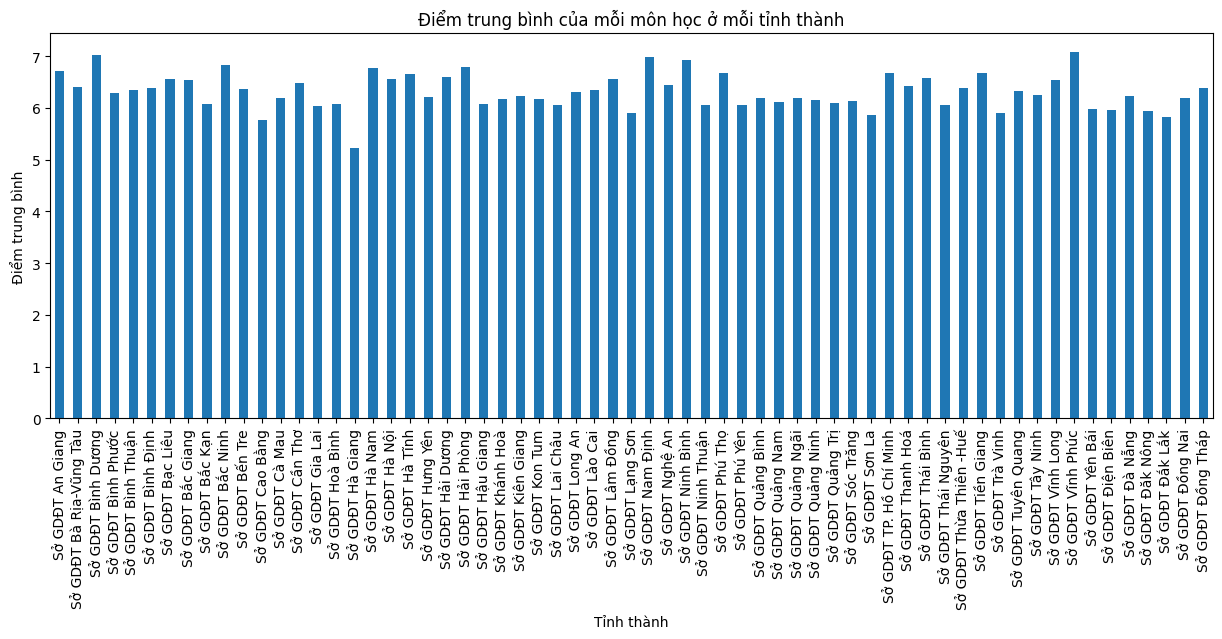

In [79]:
# Vẽ biểu đồ điểm trung bình của mỗi môn học ở mỗi tỉnh thành
diem_trung_binh_tat_ca_mon_theo_tinh.plot(kind='bar', figsize=(15, 5))
plt.title("Điểm trung bình của mỗi môn học ở mỗi tỉnh thành")
plt.ylabel("Điểm trung bình")
plt.xticks(rotation=90)
plt.show()


Bạn cũng có thể sắp xếp biểu đồ theo giá trị từ lớn tới nhỏ

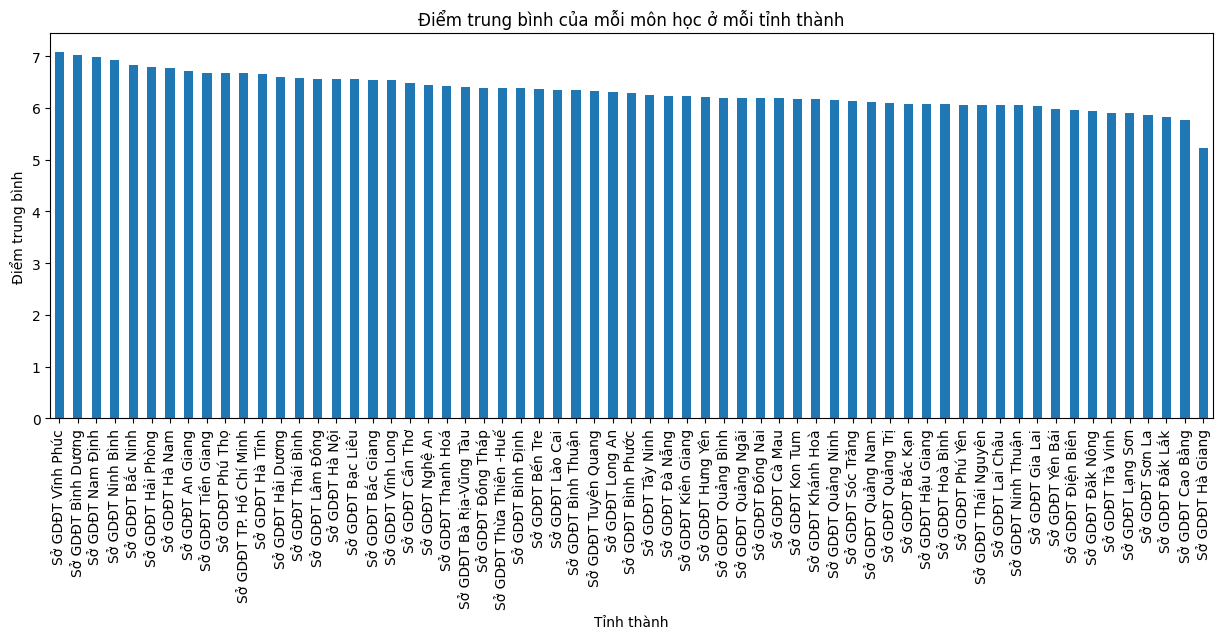

In [80]:
# Sắp xếp theo giá trị giảm dần

diem_trung_binh_tat_ca_mon_theo_tinh.sort_values(ascending=False, inplace=True)
diem_trung_binh_tat_ca_mon_theo_tinh.plot(kind='bar', figsize=(15, 5))
plt.title("Điểm trung bình của mỗi môn học ở mỗi tỉnh thành")
plt.ylabel("Điểm trung bình")
plt.xticks(rotation=90)
plt.show()


Như vậy ta có thể thấy TOP 5 tỉnh có điểm trung bình cao nhất là Vĩnh Phúc, Bình Dương, Nam Định, Bắc Ninh và Hải Phòng.

**Được rồi, giờ là phần công việc của bạn :)))**

Hãy hoàn thiện các yêu cầu còn lại

#### Điểm trung bình từng môn theo 1 tỉnh bất kỳ

* Yêu cầu: So sánh điểm trung bình của mỗi môn học theo từng tỉnh thành.
 Sau đó đưa ra phân tích: Xác định tỉnh thành có điểm trung bình cao nhất, thấp nhất ở mỗi môn học.

In [ ]:
# CODE HERE

#### Hiển thị mối liên hệ giữa điểm số của 2 môn học

Yêu cầu: Hiển thị mối liên hệ giữa điểm số của 2 môn học. Từ đó phân tích: Xác định mối tương quan giữa điểm số của các môn học, tìm hiểu xem điểm số môn này có ảnh hưởng đến điểm số môn kia hay không.

Ở đây mình sẽ ví dụ với 2 môn toán và ngữ văn.

Correlation between toan and ngu_van: 0.45861582200205053


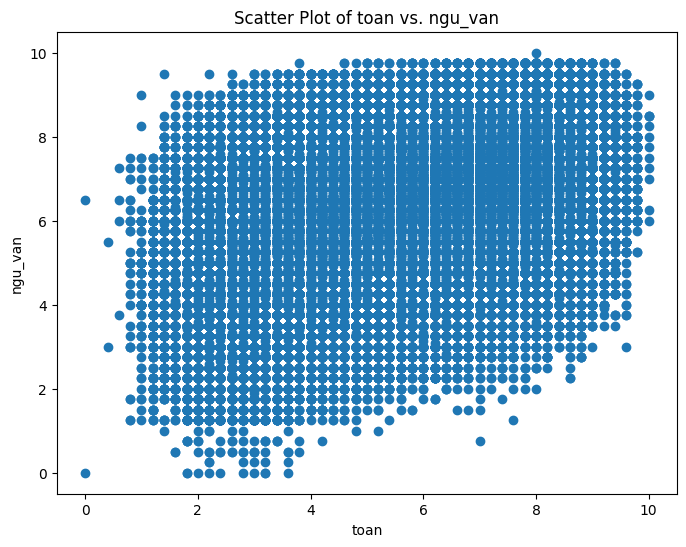

There is a moderate positive correlation between toan and ngu_van.


In [2]:
subject1 = "toan"
subject2 = "ngu_van"

# Calculate the correlation coefficient
correlation = df[subject1].astype(float).corr(df[subject2].astype(float))

# Print the correlation coefficient
print(f"Correlation between {subject1} and {subject2}: {correlation}")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[subject1].astype(float), df[subject2].astype(float))
plt.xlabel(subject1)
plt.ylabel(subject2)
plt.title(f"Scatter Plot of {subject1} vs. {subject2}")
plt.show()

# Analyze the scatter plot
# - If the points are clustered around a straight line, there is a strong correlation.
# - If the points are scattered randomly, there is no correlation.
# - If the points form a U-shape or an inverted U-shape, there is a non-linear correlation.

# Based on the scatter plot and the correlation coefficient, draw conclusions about the relationship between the two subjects.
if abs(correlation) > 0.7:
  print(f"There is a strong {('positive' if correlation > 0 else 'negative')} correlation between {subject1} and {subject2}.")
elif abs(correlation) > 0.3:
  print(f"There is a moderate {('positive' if correlation > 0 else 'negative')} correlation between {subject1} and {subject2}.")
else:
  print(f"There is no significant correlation between {subject1} and {subject2}.")



Theo biểu đồ là ta thấy ngay kết quả có sự tương quan giữa 2 môn này. Vậy từ đoạn code trên, sử dụng biểu đồ Scatter xem có sự tương quan nào giữa môn vật lý và địa lý hay không?

In [ ]:
# CODE HERE

### Phân tích chung về điểm số

Yêu cầu:
* **Biểu đồ cột:** Hiển thị điểm trung bình của mỗi môn học (Toán, Ngữ Văn, Ngoại ngữ,...) trên toàn bộ dữ liệu.
    * **Phân tích:** So sánh điểm trung bình của các môn học, tìm ra môn học có điểm trung bình cao nhất, thấp nhất.
* **Biểu đồ phân bố:** Hiển thị phân bố điểm số của mỗi môn học (sử dụng histogram hoặc box plot).
    * **Phân tích:** Nhận biết điểm số tập trung nhiều nhất, độ lệch của điểm số, điểm số cực trị.

### Nâng cao

Hãy thử tìm hiểu và đưa ra 2 ý tưởng phân tích từ dữ liệu trên. Ngoài ra, hãy thử lưu dữ liệu crawl về được sau đó lưu vào database xem. Chắc chắn là sẽ mất thêm thời gian để bạn học đó :))))

# Tổng kết

Phù ! Phân tích này có vẻ mệt nhỉ :v  
Project này chúng ta đã cùng đi crawl dữ liệu và phân tích về điểm thi đại học. Sẽ có rất nhiều ý tưởng chờ mọi người hiện thực hóa.

Rất mong cả nhà MMC của mình sẽ hoàn thành được Project nho nhỏ này. Soạn xong bài này cũng đúng 2 ngày kỳ công. Vậy nên là cả nhà đừng quên làm đủ và nộp nha. yêu cả nha :D